# OpenBanking Case
análise desenvolvida por Patricia C Guisordi

## Preparing DataFrame

In [0]:
# import data
# File location and type
file_location = "/FileStore/tables/Bank_Customer_Details_Updated-1.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

Account_No,Age,Gender,EducationLevel,Marital_Status,Account_Type,No_Of_Linked_Accounts,No_Of_Months_On_Bank,Has_Credit_Card,Credit_Score,Estimated_Income,Balance_Amount
4998365300,45,Male,High School,Married,Savings,1,42,Yes,619,60K - 80K,1000000
4998365301,49,Female,Graduate,Single,Savings,1,41,No,608,Less than 40K,2000000
4998365302,51,Male,Graduate,Married,Savings,3,42,Yes,502,80K - 120K,2500000
4998365303,40,Female,High School,null,Savings,2,39,No,699,Less than 40K,5500000
4998365304,40,Male,Uneducated,Married,Savings,1,43,Yes,850,60K - 80K,6000000
4998365305,44,Male,Graduate,Married,Savings,2,44,Yes,645,40K - 60K,6500000
4998365306,51,Male,Unknown,Married,Salary,2,50,Yes,822,120K +,7000000
4998365307,32,Male,High School,null,Current,4,29,Yes,376,60K - 80K,7500000
4998365308,37,Male,Uneducated,Single,Savings,2,44,No,501,60K - 80K,8000000
4998365309,48,Male,Graduate,Single,Savings,1,27,Yes,684,80K - 120K,8500000


In [0]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Enable Arrow-based columnar data transfers
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

# Convert the Spark DataFrame back to a pandas DataFrame using Arrow
data = df.select("*").toPandas()

warnings.filterwarnings("ignore")

pd.options.display.float_format='{:.2f}'.format

sns.set(style="darkgrid")
sns.set_palette("Paired")

### Funções

In [0]:
def null_columns(df):
    print('% null data:\n')
    null_columns = df.isna().sum() *100 / df.shape[0]
    print(null_columns.sort_values(ascending=False))

In [0]:
def check_table(df, id):
  print(f'# unique ids: {df[id].nunique()}')
  print(f'df size: {len(df)}')
  print(f'# duplicate data: {df.duplicated().sum()}')
  print('\n\033[1m null data\033[0m \n')
  print(df.isna().sum())

In [0]:
def plot_distrib(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(8,4))
            fig.suptitle(col)
            sns.distplot(df[col],ax=ax1,color='#036B52')
            sns.boxplot(data=df,y=col,ax=ax2,color='#036B52')
            plt.show()

In [0]:
def plot_cat(df):
    for col in df.columns[1:]:
        if pd.api.types.is_object_dtype(df[col]):
            fig, (ax1) = plt.subplots(ncols=1,figsize=(10,4))
            fig.suptitle(col)
            sns.countplot(data=df, x=col ,color='#036B52')
            plt.show()

In [0]:
def corr_point_biserial(df,col):
  corr_list = []
  y = df[col]

  for column in df:
      x=df[column]
      corr = stats.pointbiserialr(list(x), list(y))
      corr_list.append(corr[0])
  
  df_corr= pd.DataFrame({col: corr_list},df.columns)
  return df_corr

In [0]:
def print_test_shapiro(df):
  df = df.dropna().to_numpy()
  print(f'Amostra: {len(df)}')
  shapiro_stat, shapiro_p_value = stats.shapiro(df)
  print(f'Valor da estatística de Shapiro-Wilk: {shapiro_stat}')
  print(f'P-valor de Shapiro-Wilk: {shapiro_p_value}')
  if shapiro_p_value > 0.05 :
    print('Com 95% de confiança, os dados \033[1msão similares a uma distribuição normal\033[0;0m segundo o teste de Shapiro-Wilk.')
  else:
    print('Com 95% de confiança, os dados \033[1mnão são similares a uma distribuição normal\033[0;0m segundo o teste de Shapiro-Wilk.')

In [0]:
def print_test_mann_whitney(df1, df2):
  df1 = df1.dropna().to_numpy()
  df2 = df2.dropna().to_numpy()
  if len(df1) > 20 and len(df2) > 20: 
    print(f'Teste estatístico: {stats.mannwhitneyu(df1,df2)}')
    if stats.mannwhitneyu(df1,df2)[1] > 0.05:
      print('Com 95% de confiança, os grupos \033[1msão similares \033[0mde acordo com o teste de Mann-Whitney.')
    else:
      print('Com 95% de confiança, os grupos \033[1msão diferentes \033[0mde acordo com o teste de Mann-Whitney.')
  else:
    print('A amostra não é suficiente para ser aplicado o teste de Mann-Whitney.')

## Data

In [0]:
check_table(data,'Account_No')

# unique ids: 10000
df size: 10000
# duplicate data: 0

 null data 

Account_No 0
Age 9
Gender 2
EducationLevel 3
Marital_Status 7
Account_Type 2
No_Of_Linked_Accounts 5
No_Of_Months_On_Bank 2
Has_Credit_Card 43
Credit_Score 5
Estimated_Income 19
Balance_Amount 6
dtype: int64

In [0]:
null_columns(data)

% null data:

Has_Credit_Card 0.43
Estimated_Income 0.19
Age 0.09
Marital_Status 0.07
Balance_Amount 0.06
Credit_Score 0.05
No_Of_Linked_Accounts 0.05
EducationLevel 0.03
No_Of_Months_On_Bank 0.02
Account_Type 0.02
Gender 0.02
Account_No 0.00
dtype: float64

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 Account_No 10000 non-null object
 1 Age 9991 non-null object
 2 Gender 9998 non-null object
 3 EducationLevel 9997 non-null object
 4 Marital_Status 9993 non-null object
 5 Account_Type 9998 non-null object
 6 No_Of_Linked_Accounts 9995 non-null object
 7 No_Of_Months_On_Bank 9998 non-null object
 8 Has_Credit_Card 9957 non-null object
 9 Credit_Score 9995 non-null object
 10 Estimated_Income 9981 non-null object
 11 Balance_Amount 9994 non-null object
dtypes: object(12)
memory usage: 937.6+ KB

In [0]:
data_final = data.dropna()
print('get off:', (data.shape[0]-data_final.shape[0])*100/data.shape[0],'%')

get off: 1.0 %

In [0]:
#treating data
data_final.columns = data.columns.str.lower()
data_final['age'] = pd.to_numeric(data_final['age'])
data_final['no_of_months_on_bank']= pd.to_numeric(data_final['no_of_months_on_bank'])
data_final['credit_score'] = pd.to_numeric(data_final['credit_score'])
data_final['balance_amount'] = pd.to_numeric(data_final['balance_amount'])

In [0]:
data_final.describe()

,age,no_of_months_on_bank,credit_score,balance_amount
count,9900.00,9900.00,9900.00,9900.00
mean,46.36,38.93,650.51,388158590.20
std,7.98,10.50,96.67,244982724.30
min,26.00,18.00,350.00,138355.00
25%,41.00,32.00,584.00,1607745.25
50%,46.00,37.00,652.00,543244129.25
75%,52.00,44.00,718.00,545718844.27
max,73.00,92.00,850.00,558752028.10


In [0]:
data_final.describe(include=[object])

,account_no,gender,educationlevel,marital_status,account_type,no_of_linked_accounts,has_credit_card,estimated_income
count,9900,9900,9900,9900,9900,9900,9900,9900
unique,9900,2,7,4,4,4,2,6
top,4998371447,Female,Graduate,Married,Savings,1,Yes,Less than 40K
freq,1,5265,3049,4577,9239,5034,7019,3506


## Análise

### Distribuição

#### Variáveis Númericas

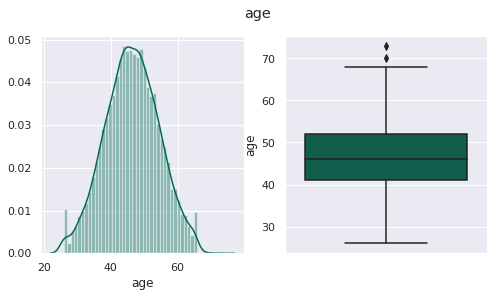

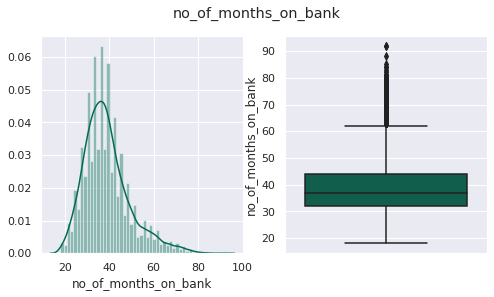

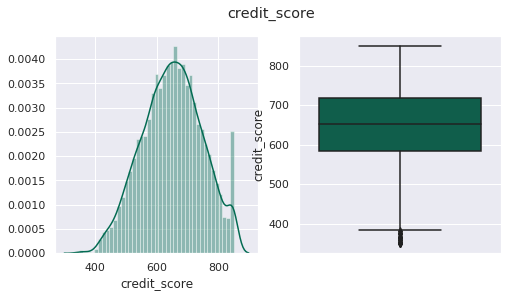

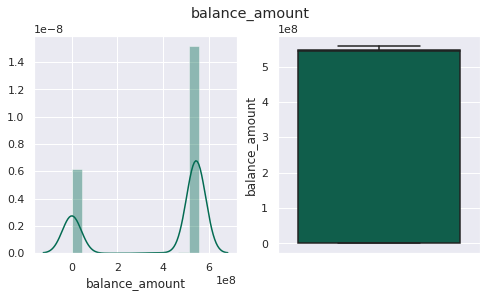

In [0]:
#get numeric data distribution
plot_distrib(data_final)

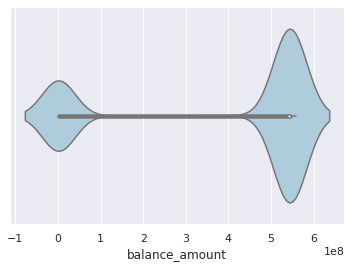

In [0]:
sns.violinplot(x=data_final['balance_amount'])

In [0]:
#amostra de 10% de data_final
df_percent = data_final.sample(frac=0.1)
df_percent.head(2)

,account_no,age,gender,educationlevel,marital_status,account_type,no_of_linked_accounts,no_of_months_on_bank,has_credit_card,credit_score,estimated_income,balance_amount
7797,4998373097,55,Male,Doctorate,Single,Savings,2,33,Yes,502,Less than 40K,541757534.80
4557,4998369857,45,Male,Graduate,Unknown,Savings,2,37,No,658,80K - 120K,547588625.00


In [0]:
df_percent['balance_amount'].describe()

Out[275]: count 990.00
mean 386853565.21
std 245695474.79
min 243588.00
25% 1608333.75
50% 543314443.20
75% 545713704.73
max 548472715.70
Name: balance_amount, dtype: float64

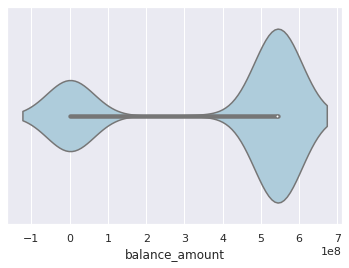

In [0]:
sns.violinplot(x=df_percent['balance_amount'])

In [0]:
df_percent.loc[(df_percent['balance_amount']>=271687) & (df_percent['balance_amount']< df_percent['balance_amount'].median()), 'balance_amount'].count()

Out[277]: 493

#### Variáveis Categóricas

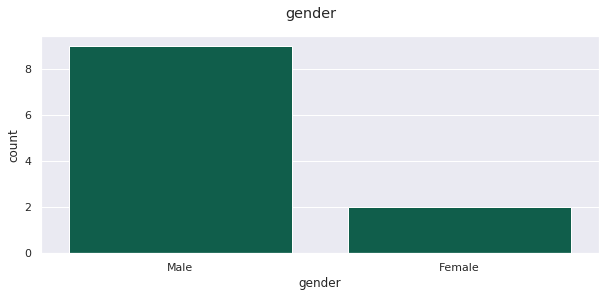

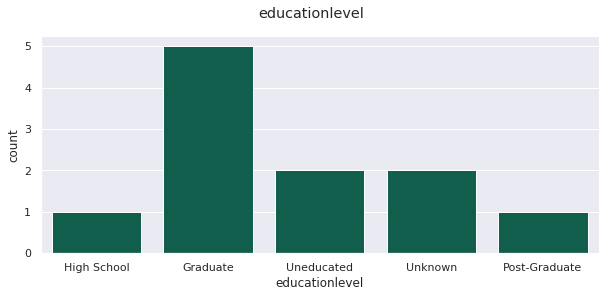

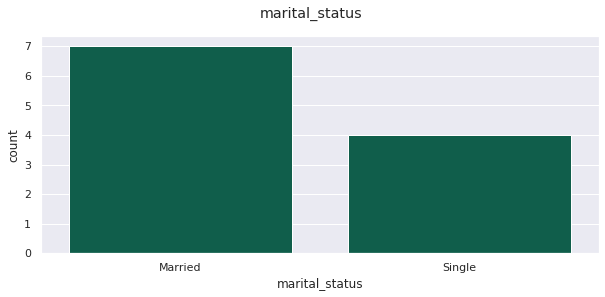

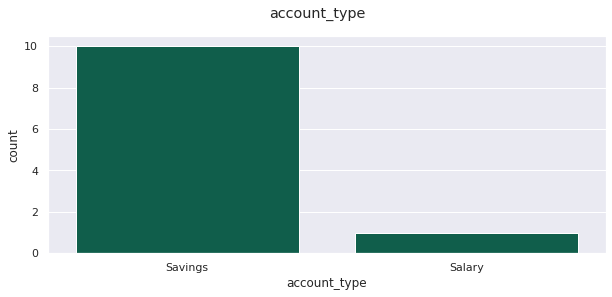

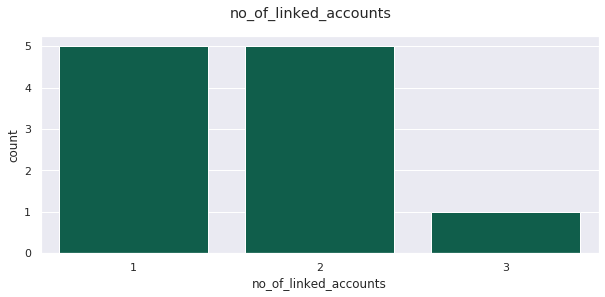

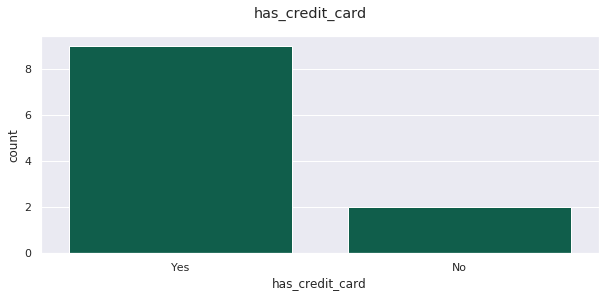

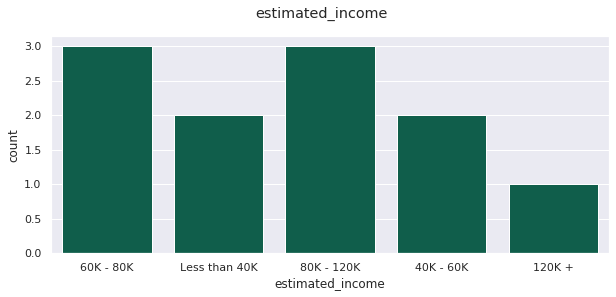

In [0]:
#get categoric data distribution
plot_cat(data_final[0:11])

#### Sexo

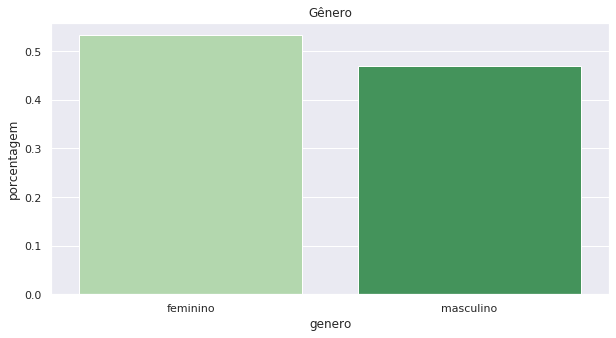

In [0]:
gender = data_final['gender'].value_counts(normalize=True).reset_index().rename(columns={'index':'genero',
                                                                                        'gender':'porcentagem'})
plt.figure(figsize=(10,5))

ax = sns.barplot(data=gender, x='genero', y='porcentagem', palette='Greens')
ax.set_xticklabels(labels=['feminino','masculino'])
plt.title('Gênero')

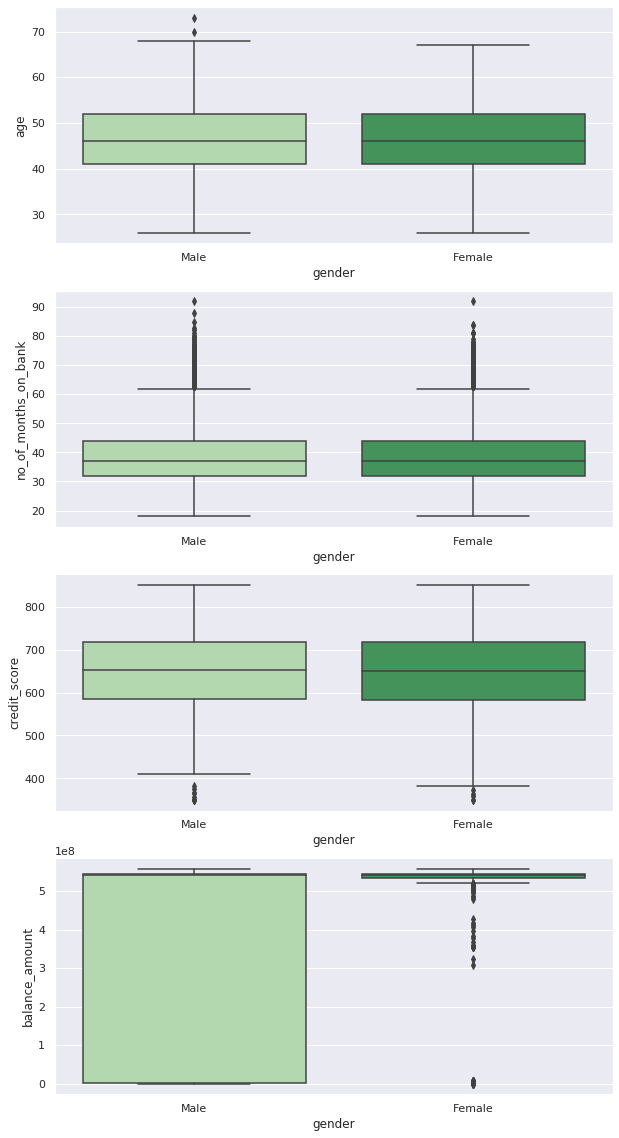

In [0]:
fig, axs = plt.subplots(nrows=4, figsize=(10, 20))
sns.boxplot(data=data_final, x='gender', y='age', ax=axs[0], palette = 'Greens')
sns.boxplot(data=data_final, x='gender', y='no_of_months_on_bank', ax=axs[1],palette = 'Greens')
sns.boxplot(data=data_final, x='gender', y='credit_score', ax=axs[2],palette = 'Greens')
sns.boxplot(data=data_final, x='gender', y='balance_amount', ax=axs[3],palette = 'Greens')

**Hipóteses**
1. A média do saldo em conta é maior para pessoas do sexo feminino do que masculino

#### Nível Educacional

In [0]:
data_final['educationlevel'].value_counts(normalize=True)

Out[281]: Graduate 0.31
High School 0.20
Unknown 0.15
Uneducated 0.15
College 0.10
Post-Graduate 0.05
Doctorate 0.04
Name: educationlevel, dtype: float64

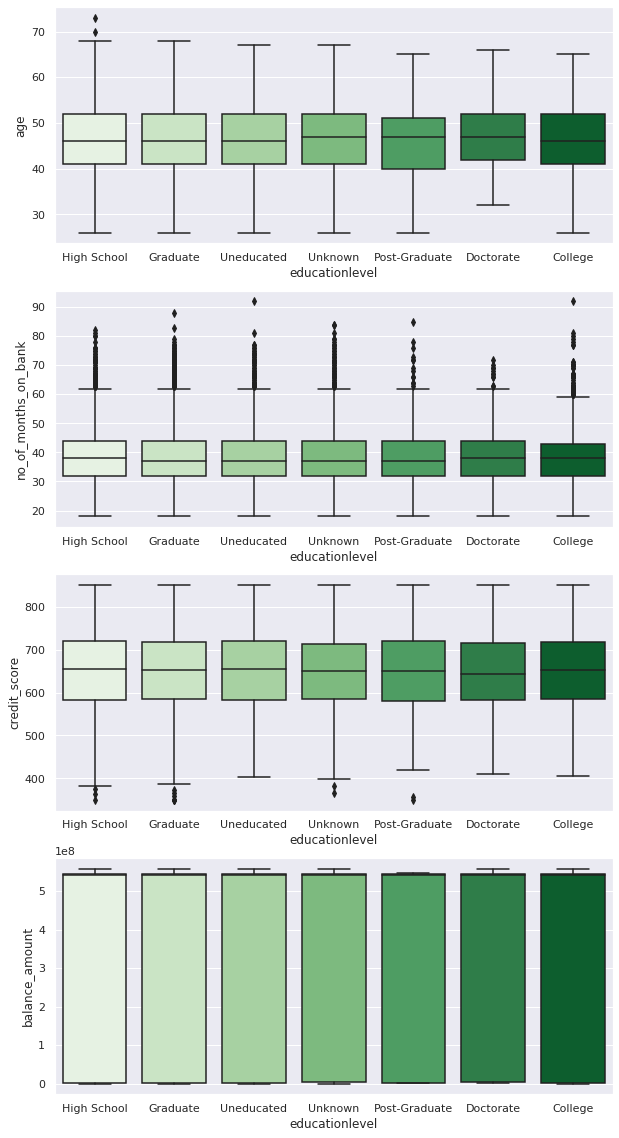

In [0]:
fig, axs = plt.subplots(nrows=4, figsize=(10, 20))
sns.boxplot(data=data_final, x='educationlevel', y='age', ax=axs[0],palette = 'Greens')
sns.boxplot(data=data_final, x='educationlevel', y='no_of_months_on_bank', ax=axs[1],palette = 'Greens')
sns.boxplot(data=data_final, x='educationlevel', y='credit_score', ax=axs[2],palette = 'Greens')
sns.boxplot(data=data_final, x='educationlevel', y='balance_amount', ax=axs[3],palette = 'Greens')

In [0]:
data_final['educational_level'] = data_final['educationlevel'].map({
  'Graduate':0, 'Post-Graduate':0, 'Doctorate':0,
  'College':0, 'High School':1, 'Uneducated':1, 'Unknown':1}) 

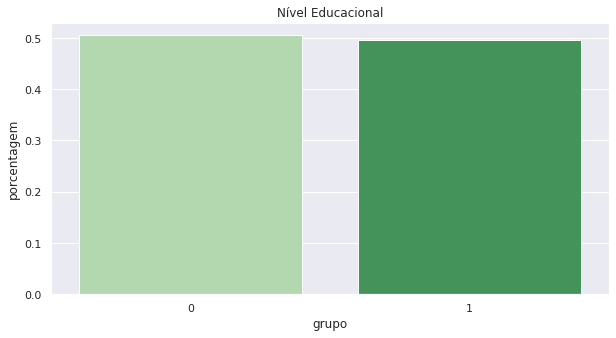

In [0]:
educational_level = data_final['educational_level'].value_counts(normalize=True).reset_index().rename(columns={'index':'grupo',
                                                                                        'educational_level':'porcentagem'})
plt.figure(figsize=(10,5))

ax = sns.barplot(data=educational_level, x='grupo', y='porcentagem', palette='Greens')
ax.set_xticklabels(labels=['0','1'])
plt.title('Nível Educacional')

**Hipóteses:**

1.  A média do credit_score é igual para as pessoas com nível educacional a partir do superior e maior
2. A variabilidade de balance_amount é igual para o grupo 0(pessoas com algum tipo de curso superior) e grupo 1(pessoas com ensino médio, sem educação e os que não sabemos o nível educacional)

#### Estado Civil

In [0]:
data_final['marital_status'].value_counts(normalize=True)

Out[285]: Married 0.46
Single 0.39
Divorced 0.07
Unknown 0.07
Name: marital_status, dtype: float64

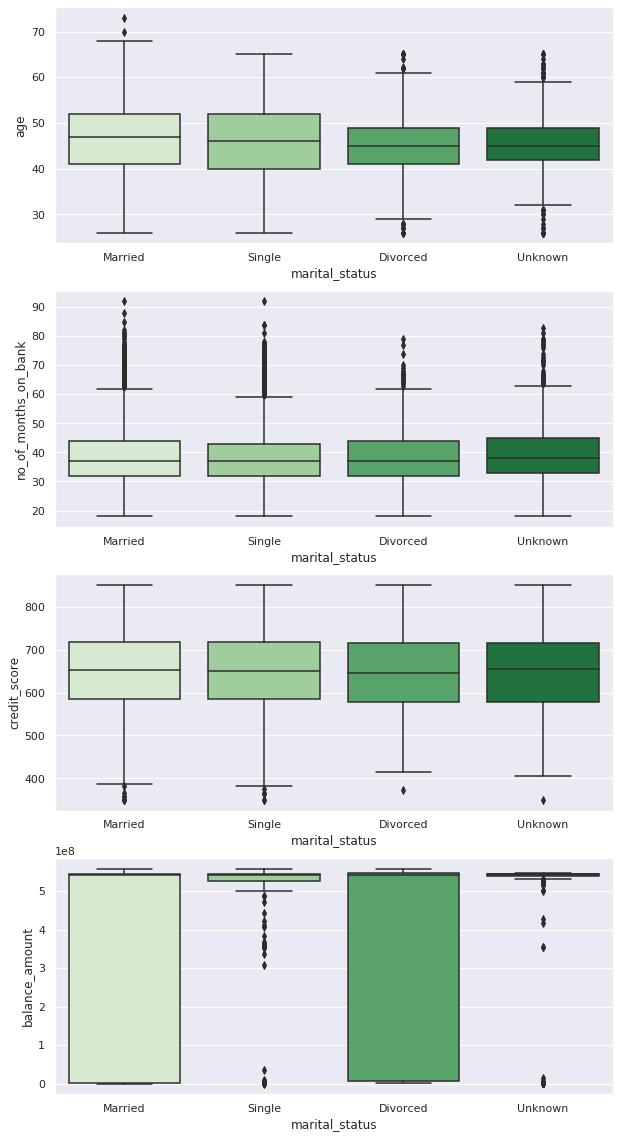

In [0]:
fig, axs = plt.subplots(nrows=4, figsize=(10, 20))
sns.boxplot(data=data_final, x='marital_status', y='age', ax=axs[0], palette='Greens')
sns.boxplot(data=data_final, x='marital_status', y='no_of_months_on_bank', ax=axs[1], palette='Greens')
sns.boxplot(data=data_final, x='marital_status', y='credit_score', ax=axs[2], palette='Greens')
sns.boxplot(data=data_final, x='marital_status', y='balance_amount', ax=axs[3], palette='Greens')

**Hipóteses:**

1. A média do balance_account das pessoas solteiras é maior do que a média das pessoas casadas.

#### Tipo de Conta

In [0]:
data_final['account_type'].value_counts(normalize=True)

Out[287]: Savings 0.93
Current 0.05
Salary 0.01
Platinum 0.00
Name: account_type, dtype: float64

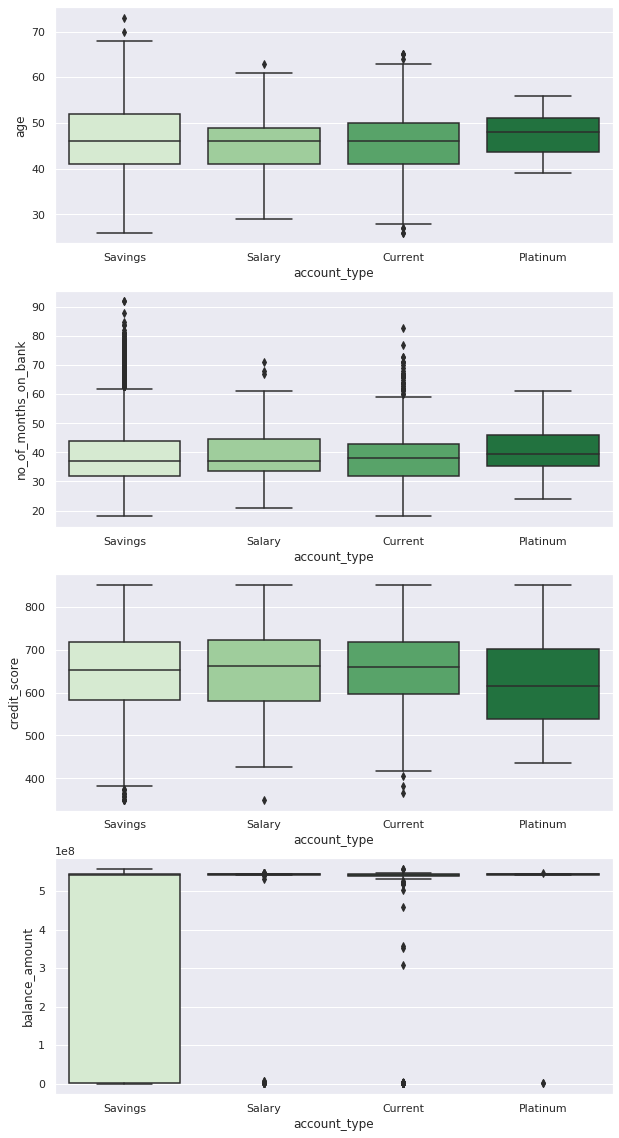

In [0]:
fig, axs = plt.subplots(nrows=4, figsize=(10, 20))
sns.boxplot(data=data_final, x='account_type', y='age', ax=axs[0],palette='Greens')
sns.boxplot(data=data_final, x='account_type', y='no_of_months_on_bank', ax=axs[1],palette='Greens')
sns.boxplot(data=data_final, x='account_type', y='credit_score', ax=axs[2],palette='Greens')
sns.boxplot(data=data_final, x='account_type', y='balance_amount', ax=axs[3],palette='Greens')

In [0]:
data_final['account_type2'] = data_final['account_type'].map({
  'Savings':0, 'Salary':1, 'Current':1,'Platinum':1 }) 
data_final['account_type2'].value_counts(normalize=True)

Out[289]: 0 0.93
1 0.07
Name: account_type2, dtype: float64

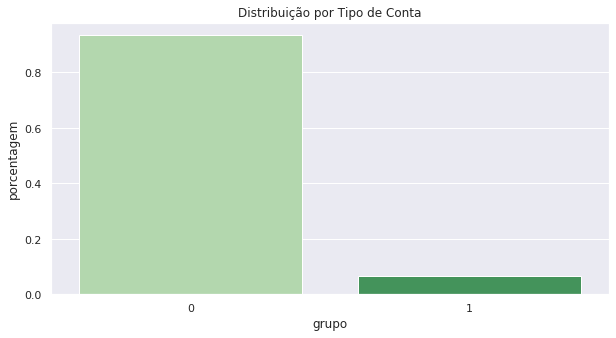

In [0]:
account_type = data_final['account_type2'].value_counts(normalize=True).reset_index().rename(columns={'index':'grupo',
                                                                                                     'account_type2': 'porcentagem'})

plt.figure(figsize=(10,5))

ax = sns.barplot(data=account_type, x='grupo', y='porcentagem', palette='Greens')
ax.set_xticklabels(labels=['0','1'])
plt.title('Distribuição por Tipo de Conta')

**Hipótese:**
1. A média do balance_amount da variável Savings é maior do que as demais.

#### No. de Contas Vinculadas

In [0]:
data_final['no_of_linked_accounts'].value_counts(normalize=True)

Out[291]: 1 0.51
2 0.46
3 0.03
4 0.01
Name: no_of_linked_accounts, dtype: float64

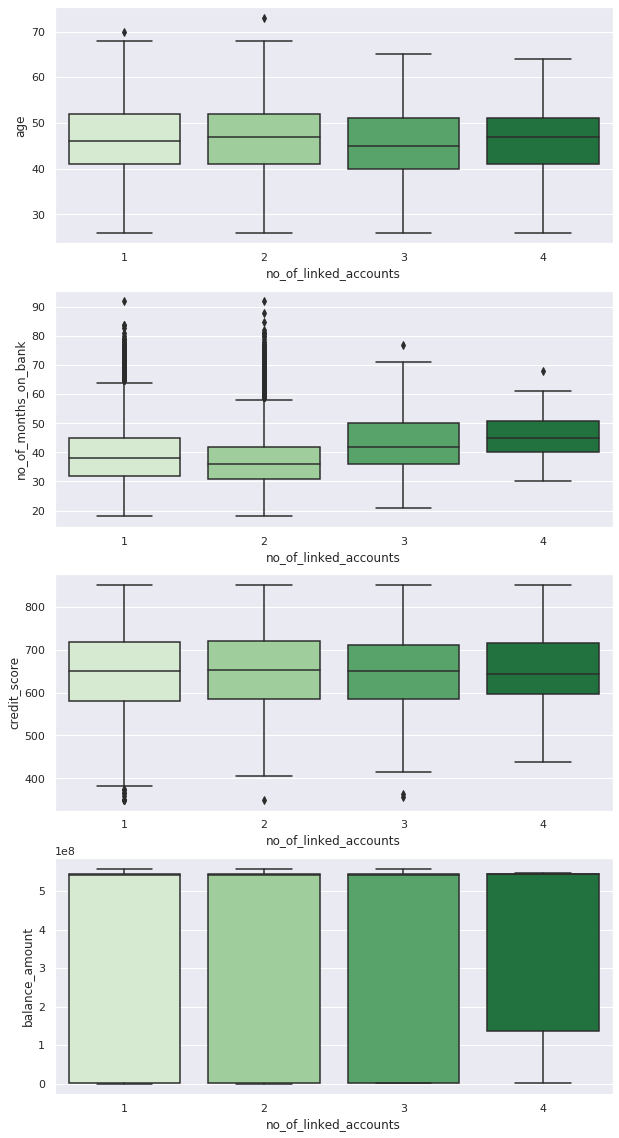

In [0]:
fig, axs = plt.subplots(nrows=4, figsize=(10, 20))
sns.boxplot(data=data_final, x='no_of_linked_accounts', y='age', ax=axs[0], palette = 'Greens')
sns.boxplot(data=data_final, x='no_of_linked_accounts', y='no_of_months_on_bank', ax=axs[1], palette='Greens')
sns.boxplot(data=data_final, x='no_of_linked_accounts', y='credit_score', ax=axs[2], palette='Greens')
sns.boxplot(data=data_final, x='no_of_linked_accounts', y='balance_amount', ax=axs[3], palette='Greens')

In [0]:
data_final['linked_accounts'] = data_final['no_of_linked_accounts'].map({
  '1':0, '2':1, '3':1,'4':1, }) 

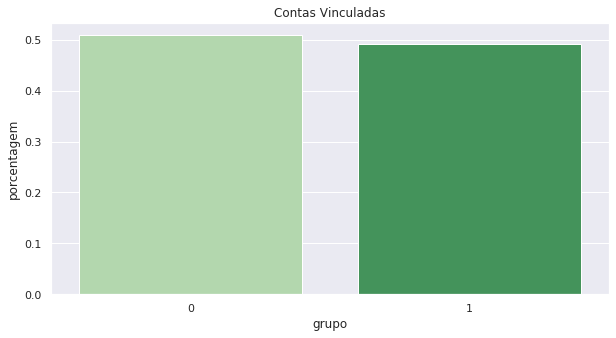

In [0]:
linked_account = data_final['linked_accounts'].value_counts(normalize=True).reset_index().rename(columns={'index':'grupo',
                                                                                                     'linked_accounts': 'porcentagem'})

plt.figure(figsize=(10,5))

ax = sns.barplot(data=linked_account, x='grupo', y='porcentagem', palette='Greens')
ax.set_xticklabels(labels=['0','1'])
plt.title('Contas Vinculadas')

**Hipótese:**
1. A média da variável no_of_months_on_bank do grupo1 (soma de quem tem 2,3 e 4 contas vinculadas) é maior do que quem tem apenas uma conta.
2. A média da variável credit_score do grupo1 é maior do que quem tem apenas uma conta

#### Cartão de Crédito

In [0]:
data_final['has_credit_card'].value_counts(normalize=True)

Out[295]: Yes 0.71
No 0.29
Name: has_credit_card, dtype: float64

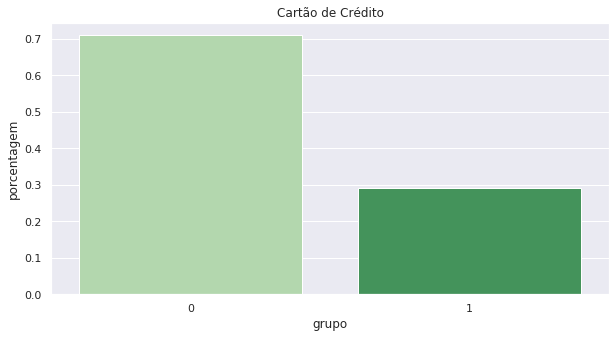

In [0]:
has_card = data_final['has_credit_card'].value_counts(normalize=True).reset_index().rename(columns={'index':'grupo',
                                                                                                     'has_credit_card': 'porcentagem'})

plt.figure(figsize=(10,5))

ax = sns.barplot(data=has_card, x='grupo', y='porcentagem', palette='Greens')
ax.set_xticklabels(labels=['0','1'])
plt.title('Cartão de Crédito')

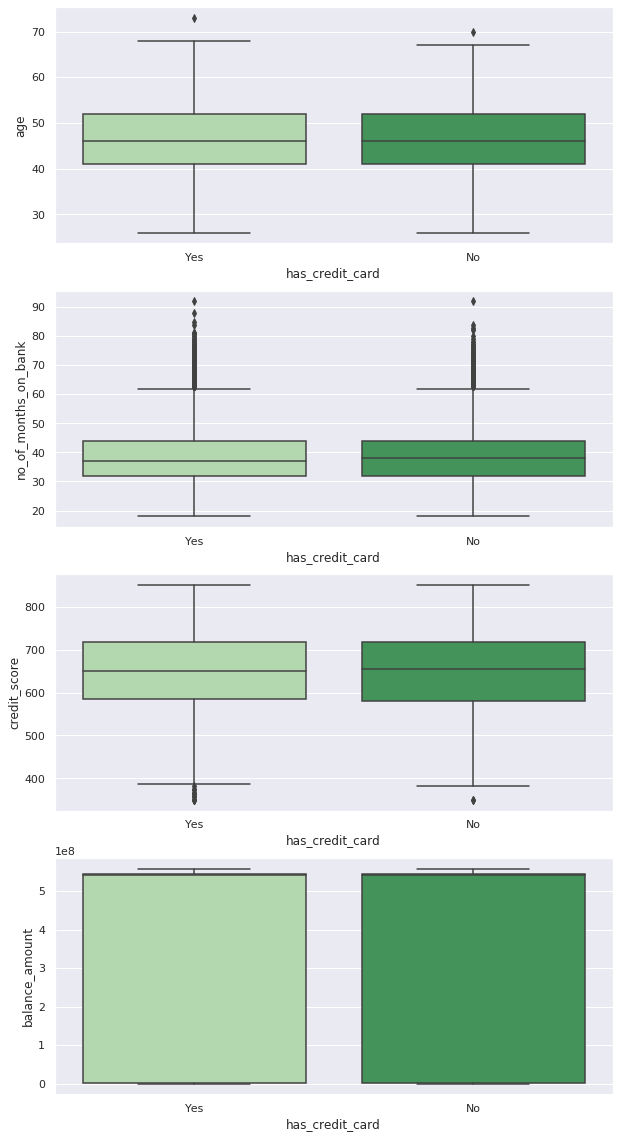

In [0]:
fig, axs = plt.subplots(nrows=4, figsize=(10, 20))
sns.boxplot(data=data_final, x='has_credit_card', y='age', ax=axs[0], palette='Greens')
sns.boxplot(data=data_final, x='has_credit_card', y='no_of_months_on_bank', ax=axs[1], palette='Greens')
sns.boxplot(data=data_final, x='has_credit_card', y='credit_score', ax=axs[2], palette='Greens')
sns.boxplot(data=data_final, x='has_credit_card', y='balance_amount', ax=axs[3], palette='Greens')

**Hipótese:**
1. Quem possui cartão de crédito tem uma média de balance_amount maior do que quem não possui.

#### Estimativa de Renda

In [0]:
data_final['estimated_income'].value_counts(normalize=True)

Out[298]: Less than 40K 0.35
40K - 60K 0.18
80K - 120K 0.15
60K - 80K 0.14
Unknown 0.11
120K + 0.07
Name: estimated_income, dtype: float64

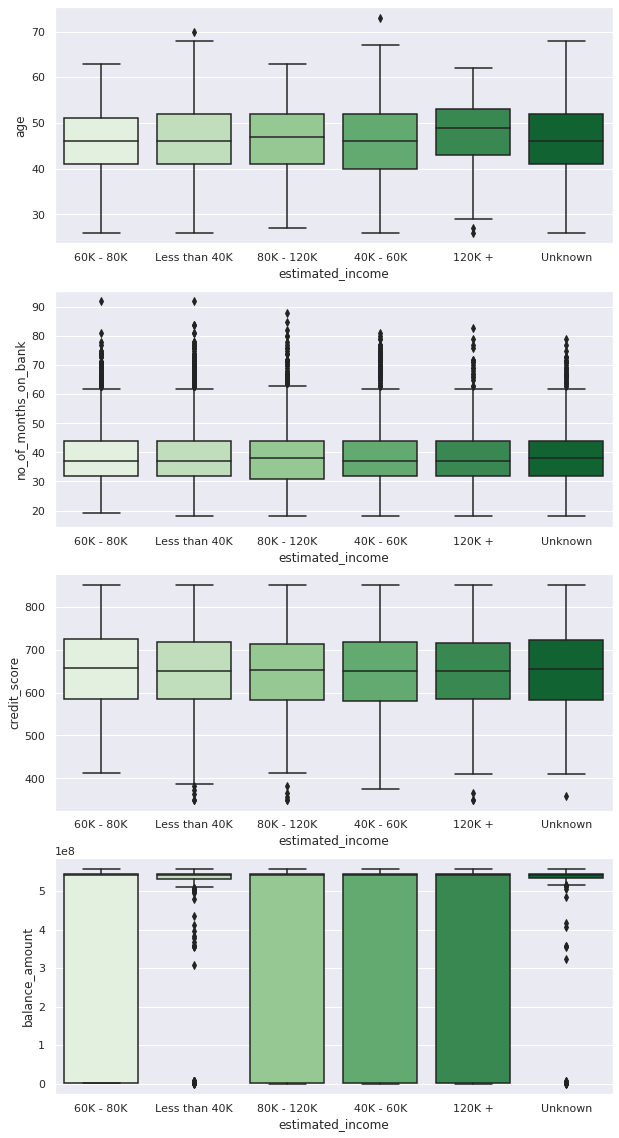

In [0]:
fig, axs = plt.subplots(nrows=4, figsize=(10, 20))
sns.boxplot(data=data_final, x='estimated_income', y='age', ax=axs[0], palette= 'Greens')
sns.boxplot(data=data_final, x='estimated_income', y='no_of_months_on_bank', ax=axs[1], palette='Greens')
sns.boxplot(data=data_final, x='estimated_income', y='credit_score', ax=axs[2], palette='Greens')
sns.boxplot(data=data_final, x='estimated_income', y='balance_amount', ax=axs[3], palette='Greens')

In [0]:
data_final['estimated_income2'] = data_final['estimated_income'].map({
  'Less than 40K':0, '40K - 60K':0, '60K - 80K':1,'80K - 120K':1,'120K +':1, 'Unknown':1 }) 
data_final['estimated_income2'].value_counts(normalize=True)

Out[300]: 0 0.53
1 0.47
Name: estimated_income2, dtype: float64

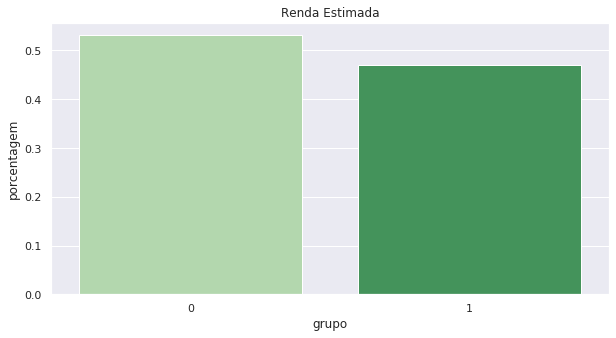

In [0]:
estimated_income = data_final['estimated_income2'].value_counts(normalize=True).reset_index().rename(columns={'index':'grupo',
                                                                                                     'estimated_income2': 'porcentagem'})

plt.figure(figsize=(10,5))

ax = sns.barplot(data=estimated_income, x='grupo', y='porcentagem', palette='Greens')
ax.set_xticklabels(labels=['0','1'])
plt.title('Renda Estimada')

**Hipóteses:**
1. O grupo0 tem uma média no_of_months_on_bank maior do que o grupo1
2. O grupo0 tem uma média de credit_score maior do que do grupo1
3. O grupo0 tem uma média de balance_amount maior do que do grupo1

###Correlações

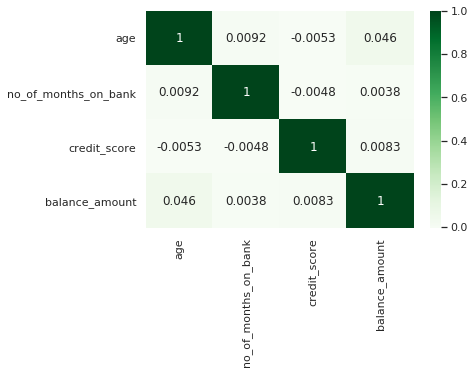

In [0]:
# Pearson's Correlations
df_corr1 = data_final[['age','no_of_months_on_bank','credit_score','balance_amount']]
sns.heatmap(df_corr1.corr(method='pearson'),cmap="Greens", annot=True)

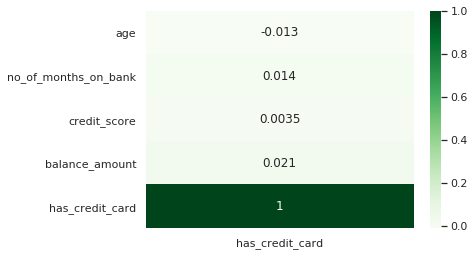

In [0]:
#Point Biserial's Correlations
df_corr2=data_final[['age','no_of_months_on_bank','credit_score','balance_amount', 'has_credit_card']]
df_corr2['has_credit_card']= np.where(df_corr2['has_credit_card'] == 'Yes', 0,1)
sns.heatmap(corr_point_biserial(df_corr2, 'has_credit_card'),cmap="Greens", annot=True)

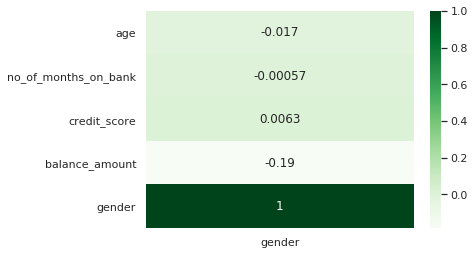

In [0]:
#Point Biserial's Correlations
df_corr3=data_final[['age','no_of_months_on_bank','credit_score','balance_amount', 'gender']]
df_corr3['gender']= np.where(df_corr3['gender'] == 'Female', 0,1)
sns.heatmap(corr_point_biserial(df_corr3, 'gender'),cmap="Greens", annot=True)

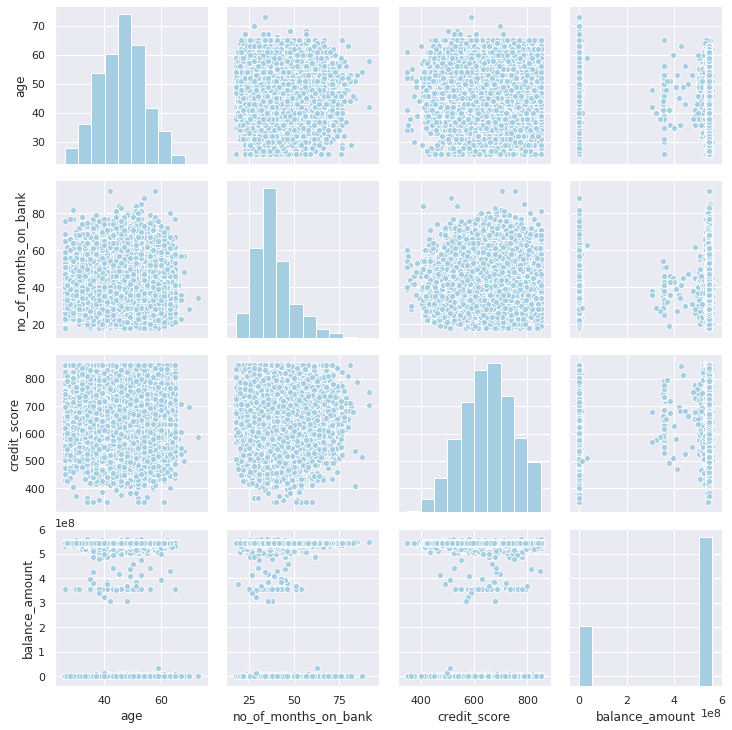

In [0]:
sns.pairplot(data_final[['age','no_of_months_on_bank','credit_score','balance_amount']])

###Testes Estatísticos

##### Relação Account_Type2 e Estimated_Income

In [0]:
contigency = pd.crosstab(data_final['account_type2'], data_final['estimated_income'], margins=True, margins_name= 'Total')
contigency

estimated_income,120K +,40K - 60K,60K - 80K,80K - 120K,Less than 40K,Unknown,Total
account_type2,,,,,,,
0,632,1637,1246,1361,3355,1008,9239
1,79,111,120,134,151,66,661
Total,711,1748,1366,1495,3506,1074,9900


**Hipótese:**
Não há relação entre as variáveis account_type2 e estimated_income

In [0]:
chi_square = 0

# significance level
alpha = 0.05


rows = data_final['account_type2'].unique()
columns = data_final['estimated_income'].unique()
for i in columns:
    for j in rows:
        O = contigency[i][j]
        E = contigency[i]['Total']* contigency['Total'][j]/contigency['Total']['Total']
        chi_square +=(O-E)**2/E
        
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
    
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 77.1097421969986 and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 77.1097421969986 and p value is: 11.070497693516351
Null Hypothesis is rejected.

Há indícios que existe correlação entre as variáveis

##### Relação Account_Type2 e Has_Credit_Card

In [0]:
contigency2 = pd.crosstab(data_final['account_type2'], data_final['has_credit_card'], margins=True, margins_name= 'Total')
contigency2

has_credit_card,No,Yes,Total
account_type2,,,
0,2691,6548,9239
1,190,471,661
Total,2881,7019,9900


**Hipótese:**
Não há relação entre as variáveis account_type2 e has_credit_card

In [0]:
chi_square = 0

# significance level
alpha = 0.05


rows = data_final['account_type2'].unique()
columns = data_final['has_credit_card'].unique()
for i in columns:
    for j in rows:
        O = contigency2[i][j]
        E = contigency2[i]['Total']* contigency2['Total'][j]/contigency2['Total']['Total']
        chi_square +=(O-E)**2/E
        
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
    
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 0.043674624981666896 and p value is: 0.8305460631159909
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 0.043674624981666896 and p value is: 3.841458820694124
Failed to reject the null hypothesis.

Há indícios de que há relação entre as variáveis

####Sexo

##### A média do balance_amount em conta é maior para pessoas do sexo feminino do que masculino

In [0]:
print_test_shapiro(data_final.loc[data_final['gender']=='Female', 'balance_amount'])

Amostra: 5265
Valor da estatística de Shapiro-Wilk: 0.5152798891067505
P-valor de Shapiro-Wilk: 0.0
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_shapiro(data_final.loc[data_final['gender']=='Male', 'balance_amount'])

Amostra: 4635
Valor da estatística de Shapiro-Wilk: 0.6249554753303528
P-valor de Shapiro-Wilk: 0.0
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_mann_whitney(data_final.loc[data_final['gender']=='Female', 'balance_amount'],
                        data_final.loc[data_final['gender']=='Male', 'balance_amount'])

Teste estatístico: MannwhitneyuResult(statistic=10423783.5, pvalue=2.5843824382208033e-36)
Com 95% de confiança, os grupos são diferentes de acordo com o teste de Mann-Whitney.

Há indícios estatísticos que mulheres possuem uma média de balance_amount maior do que homens

#### Nível Educacional:

##### A média do credit_score para as pessoas com nível educacional a partir do superior é maior do que das demais

In [0]:
print_test_shapiro(data_final.loc[data_final['educational_level']==0, 'credit_score'])

Amostra: 4996
Valor da estatística de Shapiro-Wilk: 0.9942445158958435
P-valor de Shapiro-Wilk: 2.8914582317005055e-13
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_shapiro(data_final.loc[data_final['educational_level']==1, 'credit_score'])

Amostra: 4904
Valor da estatística de Shapiro-Wilk: 0.9932447671890259
P-valor de Shapiro-Wilk: 1.7555074622167648e-14
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_mann_whitney(data_final.loc[data_final['educational_level']==0, 'credit_score'],
                        data_final.loc[data_final['educational_level']==1, 'credit_score'])

Teste estatístico: MannwhitneyuResult(statistic=12241935.0, pvalue=0.4768457056535331)
Com 95% de confiança, os grupos são similares de acordo com o teste de Mann-Whitney.

##### A variabilidade de balance_amount é igual para o grupo 0(pessoas com algum tipo de curso superior) e grupo 1(pessoas com ensino médio, sem educação e os que não sabemos o nível educacional)

In [0]:
# aplicando teste levene   
group1 = data_final.loc[data_final['educational_level']==0,'balance_amount']
group2= data_final.loc[data_final['educational_level']==1, 'balance_amount']
stat, pvalue = stats.levene(group1, group2)
if pvalue < 0.05:
    print('As variâncias dos grupos são diferentes de acordo com o teste Levene')
else:
    print('As variâncias dos grupos são similares de acordo com o teste Levene')

As variâncias dos grupos são similares de acordo com o teste Levene

Não há difereça entre as variabilidades dos grupos

#### Estado Civil

##### A média do balance_account das pessoas solteiras é maior do que a média das pessoas casadas.

In [0]:
print_test_shapiro(data_final.loc[data_final['marital_status']=='Single', 'balance_amount'])

Amostra: 3860
Valor da estatística de Shapiro-Wilk: 0.5395594835281372
P-valor de Shapiro-Wilk: 0.0
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_shapiro(data_final.loc[data_final['marital_status']=='Married', 'balance_amount'])

Amostra: 4577
Valor da estatística de Shapiro-Wilk: 0.6163122653961182
P-valor de Shapiro-Wilk: 0.0
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_mann_whitney(data_final.loc[data_final['marital_status']=='Single', 'balance_amount'],
                        data_final.loc[data_final['marital_status']=='Married', 'balance_amount'])

Teste estatístico: MannwhitneyuResult(statistic=7792115.5, pvalue=4.628018451447993e-21)
Com 95% de confiança, os grupos são diferentes de acordo com o teste de Mann-Whitney.

As pessoas solteiras possuem um saldo maior em suas contas.

#### No. de Contas Vinculadas

##### A média da variável no_of_months_on_bank do grupo1 (soma de quem tem 2,3 e 4 contas vinculadas) é maior do que do que grupo0

In [0]:
print_test_shapiro(data_final.loc[data_final['linked_accounts']== 0, 'no_of_months_on_bank'])

Amostra: 5034
Valor da estatística de Shapiro-Wilk: 0.9549625515937805
P-valor de Shapiro-Wilk: 7.760711960934983e-37
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_shapiro(data_final.loc[data_final['linked_accounts']== 1, 'no_of_months_on_bank'])

Amostra: 4866
Valor da estatística de Shapiro-Wilk: 0.9296940565109253
P-valor de Shapiro-Wilk: 5.1287523794288305e-43
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_mann_whitney(data_final.loc[data_final['linked_accounts']==1, 'no_of_months_on_bank'],
                        data_final.loc[data_final['linked_accounts']==0, 'no_of_months_on_bank'])

Teste estatístico: MannwhitneyuResult(statistic=11155807.5, pvalue=7.639115969461335e-15)
Com 95% de confiança, os grupos são diferentes de acordo com o teste de Mann-Whitney.

A média de vinculo com o banco é maior no grupo1

##### A média da variável credit_score do grupo1 é maior do que quem tem apenas uma conta

In [0]:
print_test_shapiro(data_final.loc[data_final['linked_accounts']== 0, 'credit_score'])

Amostra: 5034
Valor da estatística de Shapiro-Wilk: 0.9940804243087769
P-valor de Shapiro-Wilk: 1.452777514173581e-13
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_shapiro(data_final.loc[data_final['linked_accounts']== 1, 'credit_score'])

Amostra: 4866
Valor da estatística de Shapiro-Wilk: 0.9934310913085938
P-valor de Shapiro-Wilk: 3.5886966548394e-14
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_mann_whitney(data_final.loc[data_final['linked_accounts']==1, 'credit_score'],
                        data_final.loc[data_final['linked_accounts']==0, 'credit_score'])

Teste estatístico: MannwhitneyuResult(statistic=12039128.5, pvalue=0.07114992255917547)
Com 95% de confiança, os grupos são similares de acordo com o teste de Mann-Whitney.

Não a diferença da média do credit_score entre os grupos

#### Cartão de Crédito

##### Quem possui cartão de crédito tem uma média de balance_amount maior do que quem não possui.

In [0]:
print_test_shapiro(data_final.loc[data_final['has_credit_card']== 'Yes', 'balance_amount'])

Amostra: 7019
Valor da estatística de Shapiro-Wilk: 0.5846015214920044
P-valor de Shapiro-Wilk: 0.0
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_shapiro(data_final.loc[data_final['has_credit_card']== 'No', 'balance_amount'])

Amostra: 2881
Valor da estatística de Shapiro-Wilk: 0.5696134567260742
P-valor de Shapiro-Wilk: 0.0
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_mann_whitney(data_final.loc[data_final['has_credit_card']=='Yes', 'balance_amount'],
                        data_final.loc[data_final['has_credit_card']=='No', 'balance_amount'])

Teste estatístico: MannwhitneyuResult(statistic=9944919.0, pvalue=0.09943958536861636)
Com 95% de confiança, os grupos são similares de acordo com o teste de Mann-Whitney.

Não há evidências de que quem tem cartão de crédito tenha um saldo em conta maior

As pessoas que possuem cartão de crédito possuem um credit_score maior do que quem não possue

In [0]:
print_test_shapiro(data_final.loc[data_final['has_credit_card']== 'Yes', 'credit_score'])

Amostra: 7019
Valor da estatística de Shapiro-Wilk: 0.9940500259399414
P-valor de Shapiro-Wilk: 1.6078751305184533e-16
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_shapiro(data_final.loc[data_final['has_credit_card']== 'No', 'credit_score'])

Amostra: 2881
Valor da estatística de Shapiro-Wilk: 0.9931174516677856
P-valor de Shapiro-Wilk: 1.8794429901269893e-10
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_mann_whitney(data_final.loc[data_final['has_credit_card']=='Yes', 'credit_score'],
                        data_final.loc[data_final['has_credit_card']=='No', 'credit_score'])

Teste estatístico: MannwhitneyuResult(statistic=10085815.0, pvalue=0.42310156682933103)
Com 95% de confiança, os grupos são similares de acordo com o teste de Mann-Whitney.

Não há evidências de que o grupo que tem cartão de crédito tenha score_crédito médio mais alto do que o grupo que não possue cartão de crédito

#### Tipo de Conta

##### A média do balance_amount da variável Savings é maior do que as demais.

In [0]:
print_test_shapiro(data_final.loc[data_final['account_type2']== 0, 'balance_amount'])

Amostra: 9239
Valor da estatística de Shapiro-Wilk: 0.5843803882598877
P-valor de Shapiro-Wilk: 0.0
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_shapiro(data_final.loc[data_final['account_type2']== 1, 'balance_amount'])

Amostra: 661
Valor da estatística de Shapiro-Wilk: 0.508296549320221
P-valor de Shapiro-Wilk: 3.3461297743950155e-39
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_mann_whitney(data_final.loc[data_final['account_type2']==0, 'balance_amount'],
                        data_final.loc[data_final['account_type2']==1, 'balance_amount'])

Teste estatístico: MannwhitneyuResult(statistic=2923824.0, pvalue=0.03387452747581023)
Com 95% de confiança, os grupos são diferentes de acordo com o teste de Mann-Whitney.

Há evidências de que a média de balance_amount é maior  para o grupo que possui conta tipo Savings.

#### Estimativa de Renda

##### O grupo0 tem uma média no_of_months_on_bank maior do que o grupo1

In [0]:
print_test_shapiro(data_final.loc[data_final['estimated_income2']== 0, 'no_of_months_on_bank'])

Amostra: 5254
Valor da estatística de Shapiro-Wilk: 0.9440230131149292
P-valor de Shapiro-Wilk: 9.808248471195125e-41
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_shapiro(data_final.loc[data_final['estimated_income2']== 1, 'no_of_months_on_bank'])

Amostra: 4646
Valor da estatística de Shapiro-Wilk: 0.9429699182510376
P-valor de Shapiro-Wilk: 4.5002419922098635e-39
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_mann_whitney(data_final.loc[data_final['estimated_income2']==0, 'no_of_months_on_bank'],
                        data_final.loc[data_final['estimated_income2']==1, 'no_of_months_on_bank'])

Teste estatístico: MannwhitneyuResult(statistic=12136492.5, pvalue=0.3144382314425749)
Com 95% de confiança, os grupos são similares de acordo com o teste de Mann-Whitney.

Não há evidências de que o grupo0 tenha uma média de tempo no banco maior do que o outro grupo

##### O grupo0 tem uma média de credit_score maior do que do grupo1

In [0]:
print_test_shapiro(data_final.loc[data_final['estimated_income2']== 0, 'credit_score'])

Amostra: 5254
Valor da estatística de Shapiro-Wilk: 0.9939970374107361
P-valor de Shapiro-Wilk: 4.8429271389590495e-14
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_shapiro(data_final.loc[data_final['estimated_income2']== 1, 'credit_score'])

Amostra: 4646
Valor da estatística de Shapiro-Wilk: 0.99346524477005
P-valor de Shapiro-Wilk: 9.760406052177276e-14
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_mann_whitney(data_final.loc[data_final['estimated_income2']==0, 'credit_score'],
                        data_final.loc[data_final['estimated_income2']==1, 'credit_score'])

Teste estatístico: MannwhitneyuResult(statistic=12108802.0, pvalue=0.24883881899894889)
Com 95% de confiança, os grupos são similares de acordo com o teste de Mann-Whitney.

Não há evidências de que o grupo0 tenha média de credit_score maior do que o grupo1

##### O grupo0 tem uma média de balance_amount maior do que do grupo1

In [0]:
print_test_shapiro(data_final.loc[data_final['estimated_income2']== 0, 'balance_amount'])

Amostra: 5254
Valor da estatística de Shapiro-Wilk: 0.5518131256103516
P-valor de Shapiro-Wilk: 0.0
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_shapiro(data_final.loc[data_final['estimated_income2']== 1, 'balance_amount'])

Amostra: 4646
Valor da estatística de Shapiro-Wilk: 0.6058882474899292
P-valor de Shapiro-Wilk: 0.0
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.

In [0]:
print_test_mann_whitney(data_final.loc[data_final['estimated_income2']==0, 'balance_amount'],
                        data_final.loc[data_final['estimated_income2']==1, 'balance_amount'])

Teste estatístico: MannwhitneyuResult(statistic=11359099.0, pvalue=1.2547402594865471e-09)
Com 95% de confiança, os grupos são diferentes de acordo com o teste de Mann-Whitney.

Há evidências de que o grupo0 possui média de balance_amount maior do que o grupo1